# Usage of programming languages

I am a Software Engineer and finding the relevance of a certain programming language seems to be pretty daunting with the ever-increasing pool of programming languages and their usage. This analysis tries to shed some light on the way we can perceive this data with the help of some other datasets as well.
I am greatly indebted to jovian.ml for this course as well as the jovian package which has made version control a cake-walk almost. Setting up an adhoc online environment with Binder gives the flexibility of working on the fly with resource management as a server-sourced service available on a mouse-click.
Rest of the packages used for this analyses are pandas, matplotlib and seaborn.
The main data is sourced from https://www.kaggle.com/jaimevalero/developers-and-programming-languages

In [232]:
project_name = "usage-of-programming-languages"

In [233]:
!pip install jovian --upgrade -q
!pip install pandas

In [234]:
import jovian

In [235]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "diysane/usage-of-programming-languages" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/diysane/usage-of-programming-languages


'https://jovian.ml/diysane/usage-of-programming-languages'

## Data Preparation and Cleaning

**Import the main data**

In [236]:
import pandas as pd

In [237]:
user_lang_df = pd.read_csv('user-languages.csv')

**Describing the user-languages dataframe**

In [238]:
user_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17461 entries, 0 to 17460
Columns: 1411 entries, user_id to zsh-configuration
dtypes: float64(1320), int64(90), object(1)
memory usage: 188.0+ MB


In [239]:
user_lang_df.describe()

assembly     batchfile             c            c#           c++  \
count  17461.000000  17461.000000  17461.000000  17461.000000  17461.000000   
mean       0.000586      0.000171      0.010536      0.007451      0.010683   
std        0.006495      0.004378      0.038098      0.040868      0.041504   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.333333      0.333333      1.000000      1.000000      1.000000   

            clojure  coffeescript           css        elixir    emacs lisp  \
count  17461.000000  17461.000000  17461.000000  17461.000000  17461.000000   
mean       0.004160      0.004110      0.017955      0.003234      0.002060   
std        0.029807      0.015483      0.054260      0.024312      0.015978   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.019068      0.000000      0.000000   
max        1.000000      0.500000      1.000000      1.000000      1.000000   

       ...  yeoman-generator           yii          yii2       youtube  \
count  ...      17461.000000  17461.000000  17461.000000  17461.000000   
mean   ...          0.000236      0.000004      0.000008      0.000536   
std    ...          0.002662      0.000366      0.000744      0.004924   
min    ...          0.000000      0.000000      0.000000      0.000000   
25%    ...          0.000000      0.000000      0.000000      0.000000   
50%    ...          0.000000      0.000000      0.000000      0.000000   
75%    ...          0.000000      0.000000      0.000000      0.000000   
max    ...          0.153846      0.039265      0.090295      0.181818   

             zephir  zero-configuration        zeromq     zookeeper  \
count  1.746100e+04        17461.000000  17461.000000  17461.000000   
mean   8.055951e-07            0.000044      0.000061      0.000103   
std    1.064514e-04            0.001594      0.001163      0.001709   
min    0.000000e+00            0.000000      0.000000      0.000000   
25%    0.000000e+00            0.000000      0.000000      0.000000   
50%    0.000000e+00            0.000000      0.000000      0.000000   
75%    0.000000e+00            0.000000      0.000000      0.000000   
max    1.406650e-02            0.166667      0.058824      0.070175   

                zsh  zsh-configuration  
count  17461.000000       17461.000000  
mean       0.000125           0.000151  
std        0.002191           0.002184  
min        0.000000           0.000000  
25%        0.000000           0.000000  
50%        0.000000           0.000000  
75%        0.000000           0.000000  
max        0.105263           0.112676  

[8 rows x 1410 columns]

In [240]:
user_lang_df.head()

user_id  assembly  batchfile    c      c#      c++   clojure  \
0      007lva       0.0        0.0  0.0  0.0000  0.00000  0.000000   
1        06wj       0.0        0.0  0.0  0.0171  0.00000  0.000000   
2  0bserver07       0.0        0.0  0.0  0.0000  0.00000  0.000000   
3        0rca       0.0        0.0  0.0  0.0000  0.00000  0.252336   
4       0x00A       0.0        0.0  0.0  0.0000  0.10231  0.000000   

   coffeescript       css  elixir  ...  yeoman-generator  yii  yii2  youtube  \
0           0.0  0.000000     0.0  ...               0.0  0.0   0.0      0.0   
1           0.0  0.000000     0.0  ...               0.0  0.0   0.0      0.0   
2           0.0  0.000000     0.0  ...               0.0  0.0   0.0      0.0   
3           0.0  0.000000     0.0  ...               0.0  0.0   0.0      0.0   
4           0.0  0.005776     0.0  ...               0.0  0.0   0.0      0.0   

   zephir  zero-configuration  zeromq  zookeeper  zsh  zsh-configuration  
0     0.0                 0.0     0.0        0.0  0.0                0.0  
1     0.0                 0.0     0.0        0.0  0.0                0.0  
2     0.0                 0.0     0.0        0.0  0.0                0.0  
3     0.0                 0.0     0.0        0.0  0.0                0.0  
4     0.0                 0.0     0.0        0.0  0.0                0.0  

[5 rows x 1411 columns]

**Pivoting the table according to languages and their mean and count, based only on the entries where the values are greater than zeo, meaning where the languages are in use**

In [241]:
language_df = pd.DataFrame()
for col in user_lang_df.columns:
    if col != 'user_id':
        current_col_df = user_lang_df[user_lang_df[col] > 0.0][col]
        mean = current_col_df.mean(axis = 0, skipna = True)
        count = current_col_df.count()
        language_df = language_df.append({'language':col, 'mean': mean, 'count': count}, ignore_index=True)
language_df

count            language      mean
0      385.0            assembly  0.026580
1       83.0           batchfile  0.036043
2     4326.0                   c  0.042525
3     1779.0                  c#  0.073128
4     3859.0                 c++  0.048340
...      ...                 ...       ...
1405    34.0  zero-configuration  0.022430
1406    83.0              zeromq  0.012914
1407    91.0           zookeeper  0.019830
1408    83.0                 zsh  0.026255
1409   179.0   zsh-configuration  0.014697

[1410 rows x 3 columns]

**We've taken this dataset from https://github.com/jamhall/programming-languages-csv**

**This is to list the most widely used programming languages in the world**

In [242]:
valid_languages_df = pd.read_csv('languages.csv')
valid_languages_df

name                                                url
0       A# .NET        http://en.wikipedia.org/wiki/A_Sharp_(.NET)
1    A# (Axiom)       http://en.wikipedia.org/wiki/A_Sharp_(Axiom)
2    A-0 System            http://en.wikipedia.org/wiki/A-0_System
3            A+  http://en.wikipedia.org/wiki/A%2B_(programming...
4           A++               http://en.wikipedia.org/wiki/A%2B%2B
..          ...                                                ...
700         YQL  http://en.wikipedia.org/wiki/YQL_(programming_...
701  Z notation            http://en.wikipedia.org/wiki/Z_notation
702        Zeno  http://en.wikipedia.org/wiki/Zeno_(programming...
703        ZOPL                  http://en.wikipedia.org/wiki/ZOPL
704         ZPL  http://en.wikipedia.org/wiki/ZPL_(programming_...

[705 rows x 2 columns]

## Exploratory Analysis and Visualization

**What are the top 100 languages in use**

In [243]:
valid_languages_df['name_lower'] = valid_languages_df['name'].str.lower()
valid_existing_languages_in_projects_df = language_df.sort_values(by=['mean'], ascending=False).merge(valid_languages_df, left_on="language", right_on="name_lower", how="inner")
top_valid_existing_languages_in_projects_df = valid_existing_languages_in_projects_df.head(100)[['count', 'language', 'mean', 'name']]
top_valid_existing_languages_in_projects_df['mean * count'] = top_valid_existing_languages_in_projects_df['count'] * top_valid_existing_languages_in_projects_df['mean']
top_valid_existing_languages_in_projects_df = top_valid_existing_languages_in_projects_df.sort_values(by='mean * count', ascending = False)
top_valid_existing_languages_in_projects_df

count      language      mean          name  mean * count
0   13907.0    javascript  0.136709    JavaScript   1901.207143
1    8023.0        python  0.093100        Python    746.939461
2    6836.0          ruby  0.086823          Ruby    593.524094
3    5876.0          java  0.084789          Java    498.222018
8    4448.0           php  0.067857           PHP    301.829051
26   8937.0        simple  0.031126        SiMPLE    278.171300
6    3424.0   objective-c  0.075771   Objective-C    259.440854
9    3353.0            go  0.067578            Go    226.589136
16   3859.0           c++  0.048340           C++    186.543130
21   4326.0             c  0.042525             C    183.962075
7    1779.0            c#  0.073128            C#    130.094245
14   1538.0         scala  0.050027         Scala     76.942149
15   1482.0    typescript  0.050018    TypeScript     74.127341
5     944.0       clojure  0.076943       Clojure     72.634381
29   2753.0  coffeescript  0.026070  CoffeeScript     71.769594
4     686.0        elixir  0.082310        Elixir     56.464479
10    635.0       haskell  0.067399       Haskell     42.798529
17    808.0          perl  0.046923          Perl     37.913814
22    923.0    emacs lisp  0.038972    Emacs Lisp     35.971097
13    564.0          rust  0.056869          Rust     32.074194
19    741.0           lua  0.043140           Lua     31.966854
11    368.0        kotlin  0.066712        Kotlin     24.550189
24    571.0           tex  0.032154           TeX     18.359679
25    571.0           tex  0.032154           TEX     18.359679
12    270.0    powershell  0.062196    PowerShell     16.792916
28    583.0         spark  0.026258         SPARK     15.308307
20    316.0        matlab  0.042988        MATLAB     13.584335
18    211.0         ocaml  0.044243         OCaml      9.335323
37    251.0    ecmascript  0.020249    ECMAScript      5.082384
34     83.0          bash  0.021338          Bash      1.771064
35     83.0          bash  0.021338          bash      1.771064
23     33.0          glsl  0.038122          GLSL      1.258042
32     26.0            io  0.023960            Io      0.622962
27     20.0        timber  0.029217        Timber      0.584348
30     11.0          curl  0.024561          Curl      0.270166
31     11.0          code  0.024066          CODE      0.264726
38     13.0          hugo  0.018879          Hugo      0.245421
33      7.0          brew  0.022584          BREW      0.158087
36      3.0            ml  0.021244            ML      0.063732
39      2.0          pure  0.017980          Pure      0.035959

**Top 10 most relevant languages**

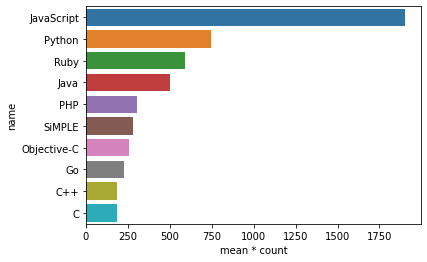

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x="mean * count", y="name", data=top_valid_existing_languages_in_projects_df.head(10))

**How many unique users?**

In [245]:
pd.DataFrame(user_lang_df.user_id.unique()).count()

0    17461
dtype: int64

**Shape?**

In [246]:
user_lang_df.shape

(17461, 1411)

***This means that all the users are unique here***

In [247]:
existing_languages_df = valid_existing_languages_in_projects_df.language
technology_set = set()
technology_dict = dict()
for i, row in user_lang_df.iterrows():
    current_set_of_languages = set()
    for language in existing_languages_df:
        if row[language] > 0.0:
            current_set_of_languages.add(language)
    technology_set.add(frozenset(current_set_of_languages))
    if frozenset(current_set_of_languages) in technology_dict.keys():
        technology_dict[frozenset(current_set_of_languages)] = technology_dict[frozenset(current_set_of_languages)] + 1
    else:
        technology_dict[frozenset(current_set_of_languages)] = 1
technology_dict

{frozenset({'go', 'java', 'javascript', 'python', 'ruby', 'simple'}): 23,
 frozenset({'c#', 'javascript', 'python', 'typescript'}): 4,
 frozenset({'javascript', 'objective-c', 'perl', 'python', 'ruby'}): 1,
 frozenset({'clojure', 'haskell', 'java', 'ruby'}): 1,
 frozenset({'c++', 'ecmascript', 'javascript', 'simple'}): 2,
 frozenset({'bash',
            'c',
            'c#',
            'c++',
            'java',
            'javascript',
            'matlab',
            'python'}): 1,
 frozenset({'c', 'javascript', 'lua', 'php', 'python'}): 1,
 frozenset({'go', 'javascript', 'python'}): 29,
 frozenset({'c', 'c++', 'objective-c', 'python', 'ruby', 'simple'}): 4,
 frozenset({'javascript', 'python', 'ruby', 'scala', 'simple'}): 8,
 frozenset({'c', 'c#', 'java', 'javascript', 'ocaml', 'python', 'simple'}): 1,
 frozenset({'c', 'javascript', 'python', 'simple'}): 21,
 frozenset({'c',
            'java',
            'javascript',
            'python',
            'scala',
            'simp

In [248]:
technology_combo_freq_df = pd.DataFrame(columns = ['language_combo', 'frequency'])
for combo in technology_dict.keys():
    curr_dict = dict()
    curr_dict['language_combo'] = ",".join(combo)
    curr_dict['frequency'] = technology_dict[combo]
    technology_combo_freq_df = technology_combo_freq_df.append(curr_dict, ignore_index=True)
technology_combo_freq_df

language_combo frequency
0                 simple,java,go,ruby,javascript,python        23
1                       typescript,javascript,python,c#         4
2               perl,javascript,ruby,python,objective-c         1
3                             haskell,java,ruby,clojure         1
4                      c++,simple,javascript,ecmascript         2
...                                                 ...       ...
6917                                             elixir         1
6918  php,simple,lua,ruby,c++,c,java,objective-c,jav...         1
6919  simple,coffeescript,go,ruby,elixir,objective-c...         1
6920         php,java,objective-c,ecmascript,javascript         1
6921              simple,java,kotlin,python,objective-c         1

[6922 rows x 2 columns]

In [249]:
technology_combo_freq_df = technology_combo_freq_df.sort_values(by = ['frequency'], ascending = False).head(100)
technology_combo_freq_df = technology_combo_freq_df.reset_index()
technology_combo_freq_df

index                                   language_combo frequency
0      24                                       javascript       590
1      44                                                        324
2      45                                simple,javascript       242
3      30                            php,simple,javascript       198
4      57                                   php,javascript       190
..    ...                                              ...       ...
95    473                     c++,simple,javascript,python        20
96    566                                           simple        20
97    558                                      java,kotlin        20
98    686                               simple,java,kotlin        20
99    704  simple,coffeescript,javascript,ruby,objective-c        20

[100 rows x 3 columns]

**Top 10 language combos**

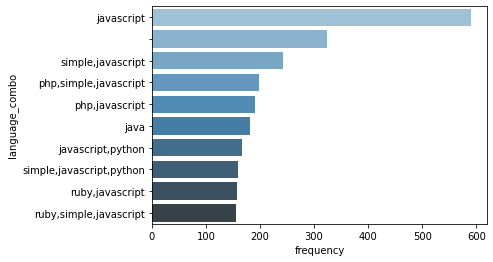

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x="frequency", y="language_combo", data=technology_combo_freq_df.head(10), palette="Blues_d")

**We try to find the most used languages (or claims) which are not there in the valid language list**

In [251]:
invalid_existing_languages_in_projects_df = language_df.sort_values(by=['count', 'mean'], ascending=False)[~language_df.language.isin(valid_languages_df['name_lower'])]
invalid_existing_languages_in_projects_df.head(100)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count     language      mean
718  8549.0      library  0.032108
507  7405.0    framework  0.027468
7    7194.0          css  0.043580
486  7074.0        files  0.031685
31   7021.0        shell  0.040814
..      ...          ...       ...
391  1273.0  distributed  0.020222
427  1260.0      dynamic  0.019199
941  1249.0      plugins  0.019074
472  1248.0     facebook  0.018923
199  1247.0       bundle  0.022471

[100 rows x 3 columns]

**This is to look for a correlation between the mean (average proportion in the projects it is present) vs frequency (number of users who claim to use it). This may help us in finding the outliers**

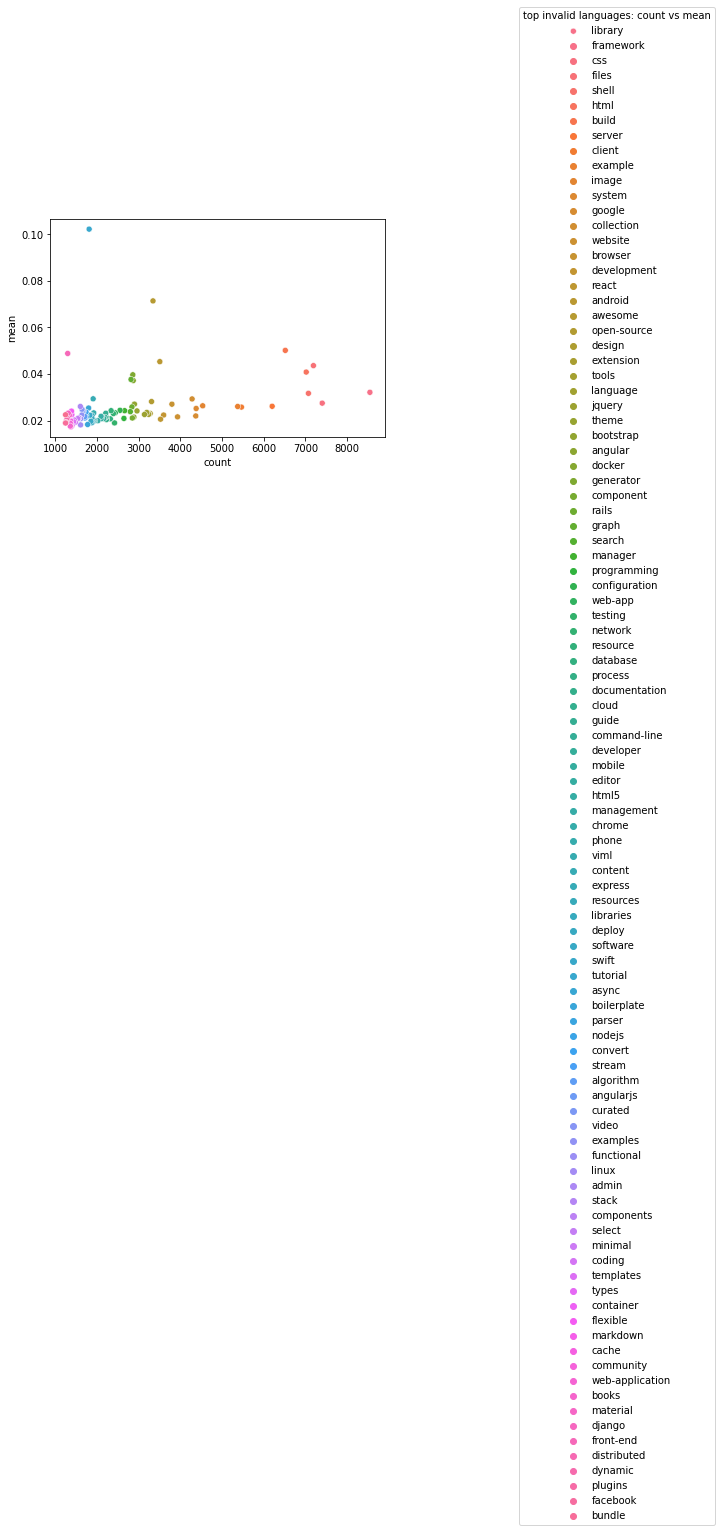

<Figure size 1440x1440 with 0 Axes>

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(data=invalid_existing_languages_in_projects_df.head(100), x="count", y="mean", hue="language")

plt.legend(title='top invalid languages: count vs mean', loc='upper right', bbox_to_anchor=(2.00, 2.00), ncol=1, labels=invalid_existing_languages_in_projects_df.head(100).language)

fig = plt.figure(figsize =(20, 20)) 
plt.show(ax)

**We've taken below data from Wikipedia (https://en.wikipedia.org/wiki/Programming_languages_used_in_most_popular_websites) and converted the table to csv with the help of https://www.convertcsv.com/html-table-to-csv.htm**

In [253]:
most_popular_website_languages_df = pd.read_csv("most-popular-website-languages.csv")

In [254]:
most_popular_website_languages_df

Websites Popularity\r\n(unique visitors per month)[1]  \
0       Google[2]                                1,600,000,000   
1        Facebook                                1,100,000,000   
2         YouTube                                1,100,000,000   
3           Yahoo                                  750,000,000   
4          Amazon                                  500,000,000   
5       Wikipedia                                  475,000,000   
6         Twitter                                  290,000,000   
7            Bing                                  285,000,000   
8            eBay                                  285,000,000   
9             MSN                                  280,000,000   
10       LinkedIn                                  260,000,000   
11      Pinterest                                  250,000,000   
12  WordPress.com                                  240,000,000   

   Front-end\r\n(Client-side)  \
0      JavaScript, TypeScript   
1            JavaScript, Flow   
2                  JavaScript   
3                  JavaScript   
4                  JavaScript   
5                  JavaScript   
6                  JavaScript   
7                  JavaScript   
8                  JavaScript   
9                  JavaScript   
10                 JavaScript   
11                 JavaScript   
12                 JavaScript   

                            Back-end\r\n(Server-side)  \
0                   C, C++, Go,[3] Java, Python, Node   
1   Hack, PHP (HHVM), Python, C++, Java, Erlang, D...   
2                    C, C++, Python, Java,[11] Go[12]   
3                                                 PHP   
4                                 Java, C++, Perl[15]   
5                                                 PHP   
6                      C++, Java[18], Scala[19], Ruby   
7                                             C++, C#   
8                 Java,[21] JavaScript,[22] Scala[23]   
9                                                  C#   
10                        Java, JavaScript,[24] Scala   
11                        Python (Django),[26] Erlang   
12                                                PHP   

                                      Database  \
0                      Bigtable,[4] MariaDB[5]   
1      MariaDB, MySQL,[9] HBase, Cassandra[10]   
2             Vitess, BigTable, MariaDB[5][13]   
3   PostgreSQL, HBase, Cassandra, MongoDB,[14]   
4              PostgreSQL, RDS, RDS Aurora[16]   
5                                  MariaDB[17]   
6                                    MySQL[20]   
7              Microsoft SQL Server, Cosmos DB   
8                              Oracle Database   
9                         Microsoft SQL Server   
10                               Voldemort[25]   
11                           MySQL, Redis [27]   
12  PostgreSQL, HBase, Cassandra, MongoDB,[14]   

                                                Notes  
0            The most used search engine in the world  
1             The most visited social networking site  
2                 The most visited video sharing site  
3                                                 NaN  
4                      Popular Internet shopping site  
5   "MediaWiki" is programmed in PHP; free online ...  
6                             Popular social network.  
7                       Search engine from Microsoft.  
8                               Online auction house.  
9   An email client, for simple use. Previously kn...  
10              World's largest professional network.  
11                           Search engine for ideas.  
12                          Website manager software.

**We see that only the frontend and the back-end languages are of significance to us. Let's first remove \n and \r characters**

In [255]:
most_popular_website_languages_df = most_popular_website_languages_df.rename(columns={"Front-end\r\n(Client-side)": "Front-end", "Back-end\r\n(Server-side)": "Back-end"})
most_popular_website_languages_df

Websites Popularity\r\n(unique visitors per month)[1]  \
0       Google[2]                                1,600,000,000   
1        Facebook                                1,100,000,000   
2         YouTube                                1,100,000,000   
3           Yahoo                                  750,000,000   
4          Amazon                                  500,000,000   
5       Wikipedia                                  475,000,000   
6         Twitter                                  290,000,000   
7            Bing                                  285,000,000   
8            eBay                                  285,000,000   
9             MSN                                  280,000,000   
10       LinkedIn                                  260,000,000   
11      Pinterest                                  250,000,000   
12  WordPress.com                                  240,000,000   

                 Front-end                                           Back-end  \
0   JavaScript, TypeScript                  C, C++, Go,[3] Java, Python, Node   
1         JavaScript, Flow  Hack, PHP (HHVM), Python, C++, Java, Erlang, D...   
2               JavaScript                   C, C++, Python, Java,[11] Go[12]   
3               JavaScript                                                PHP   
4               JavaScript                                Java, C++, Perl[15]   
5               JavaScript                                                PHP   
6               JavaScript                     C++, Java[18], Scala[19], Ruby   
7               JavaScript                                            C++, C#   
8               JavaScript                Java,[21] JavaScript,[22] Scala[23]   
9               JavaScript                                                 C#   
10              JavaScript                        Java, JavaScript,[24] Scala   
11              JavaScript                        Python (Django),[26] Erlang   
12              JavaScript                                                PHP   

                                      Database  \
0                      Bigtable,[4] MariaDB[5]   
1      MariaDB, MySQL,[9] HBase, Cassandra[10]   
2             Vitess, BigTable, MariaDB[5][13]   
3   PostgreSQL, HBase, Cassandra, MongoDB,[14]   
4              PostgreSQL, RDS, RDS Aurora[16]   
5                                  MariaDB[17]   
6                                    MySQL[20]   
7              Microsoft SQL Server, Cosmos DB   
8                              Oracle Database   
9                         Microsoft SQL Server   
10                               Voldemort[25]   
11                           MySQL, Redis [27]   
12  PostgreSQL, HBase, Cassandra, MongoDB,[14]   

                                                Notes  
0            The most used search engine in the world  
1             The most visited social networking site  
2                 The most visited video sharing site  
3                                                 NaN  
4                      Popular Internet shopping site  
5   "MediaWiki" is programmed in PHP; free online ...  
6                             Popular social network.  
7                       Search engine from Microsoft.  
8                               Online auction house.  
9   An email client, for simple use. Previously kn...  
10              World's largest professional network.  
11                           Search engine for ideas.  
12                          Website manager software.

**Needing only the 3rd and 4th column, we'll shrink the actual dataframe**

In [256]:
most_popular_website_languages_df = most_popular_website_languages_df[["Front-end", "Back-end"]]
most_popular_website_languages_df

Front-end                                           Back-end
0   JavaScript, TypeScript                  C, C++, Go,[3] Java, Python, Node
1         JavaScript, Flow  Hack, PHP (HHVM), Python, C++, Java, Erlang, D...
2               JavaScript                   C, C++, Python, Java,[11] Go[12]
3               JavaScript                                                PHP
4               JavaScript                                Java, C++, Perl[15]
5               JavaScript                                                PHP
6               JavaScript                     C++, Java[18], Scala[19], Ruby
7               JavaScript                                            C++, C#
8               JavaScript                Java,[21] JavaScript,[22] Scala[23]
9               JavaScript                                                 C#
10              JavaScript                        Java, JavaScript,[24] Scala
11              JavaScript                        Python (Django),[26] Erlang
12              JavaScript                                                PHP

**As there are some unwanted characters, we'll remove them first**

In [257]:
most_popular_website_languages_df = most_popular_website_languages_df.replace(regex=r' ', value='')
most_popular_website_languages_df = most_popular_website_languages_df.replace(regex=r'\[.*\]', value='')
most_popular_website_languages_df = most_popular_website_languages_df.replace(regex=r'\(.*\)', value='')
most_popular_website_languages_df

Front-end                            Back-end
0   JavaScript,TypeScript           C,C++,Go,Java,Python,Node
1         JavaScript,Flow  Hack,PHP,Python,C++,Java,Erlang,D,
2              JavaScript                  C,C++,Python,Java,
3              JavaScript                                 PHP
4              JavaScript                       Java,C++,Perl
5              JavaScript                                 PHP
6              JavaScript                       C++,Java,Ruby
7              JavaScript                              C++,C#
8              JavaScript                               Java,
9              JavaScript                                  C#
10             JavaScript               Java,JavaScript,Scala
11             JavaScript                       Python,Erlang
12             JavaScript                                 PHP

In [258]:
big_tech_language_freq_dict = dict()
big_tech_language_list = list()
for i, row in most_popular_website_languages_df.iterrows():
    big_tech_language_list += row["Front-end"].split(",")
    big_tech_language_list += row["Back-end"].split(",")
big_tech_language_list
for language in big_tech_language_list:
    if language in big_tech_language_freq_dict.keys():
        big_tech_language_freq_dict[language] += 1
    else:
        big_tech_language_freq_dict[language] = 1
big_tech_language_freq_dict

{'JavaScript': 14,
 'TypeScript': 1,
 'C': 2,
 'C++': 6,
 'Go': 1,
 'Java': 7,
 'Python': 4,
 'Node': 1,
 'Flow': 1,
 'Hack': 1,
 'PHP': 4,
 'Erlang': 2,
 'D': 1,
 '': 3,
 'Perl': 1,
 'Ruby': 1,
 'C#': 2,
 'Scala': 1}

In [259]:
import jovian

In [260]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "diysane/usage-of-programming-languages" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/diysane/usage-of-programming-languages


'https://jovian.ml/diysane/usage-of-programming-languages'

In [261]:
!pip install matplotlib seaborn numpy

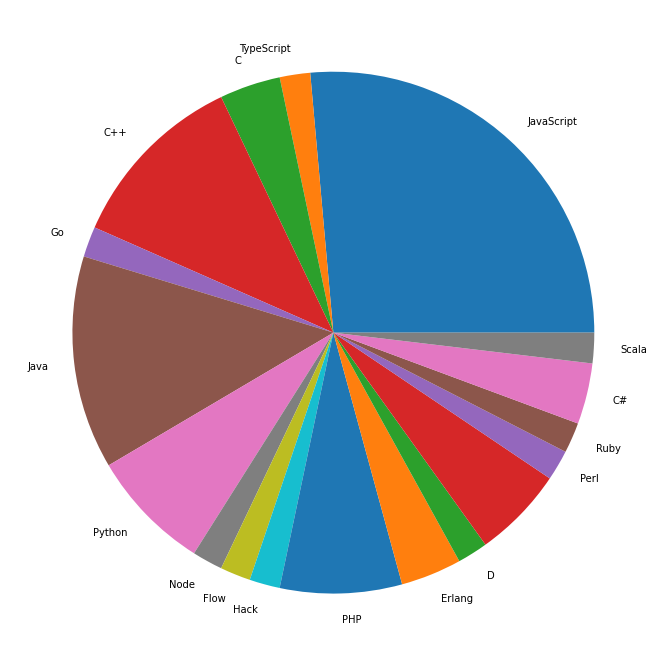

In [262]:
from matplotlib import pyplot as plt 
import numpy as np 
%matplotlib inline
  
big_tech_languages = big_tech_language_freq_dict.keys()
  
big_tech_languages_frequencies = big_tech_language_freq_dict.values()
  
# Creating plot 
fig_tech_giant = plt.figure(figsize =(12, 12)) 
plt.pie(big_tech_languages_frequencies, labels = big_tech_languages) 
  
# show plot 
plt.show() 

In [263]:
github_usage_with_big_tech_languages_df = pd.DataFrame()
for language in big_tech_languages:
    current_df = language_df[language_df['language'] == language.lower()]
    current_df['language'] = language
    github_usage_with_big_tech_languages_df = github_usage_with_big_tech_languages_df.append(current_df, ignore_index=True)
github_usage_with_big_tech_languages_df

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count    language      mean
0   13907.0  JavaScript  0.136709
1    1482.0  TypeScript  0.050018
2    4326.0           C  0.042525
3    3859.0         C++  0.048340
4    3353.0          Go  0.067578
5    5876.0        Java  0.084789
6    8023.0      Python  0.093100
7      74.0        Node  0.024998
8      11.0        Flow  0.025803
9      20.0        Hack  0.026611
10   4448.0         PHP  0.067857
11    808.0        Perl  0.046923
12   6836.0        Ruby  0.086823
13   1779.0          C#  0.073128
14   1538.0       Scala  0.050027

In [264]:
github_usage_with_big_tech_languages = github_usage_with_big_tech_languages_df.language
github_usage_with_big_tech_languages_frequencies = github_usage_with_big_tech_languages_df['count'].astype(int)
  
fig_github_pie = plt.figure(figsize =(12, 12)) 
plt.pie(github_usage_with_big_tech_languages_frequencies, labels = github_usage_with_big_tech_languages) 
  
# show plot 
plt.show() 

In [265]:
import jovian

In [266]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "diysane/usage-of-programming-languages" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/diysane/usage-of-programming-languages


'https://jovian.ml/diysane/usage-of-programming-languages'

## Asking and Answering Questions

**1. What are the most relevant languages now, that people are working on?**

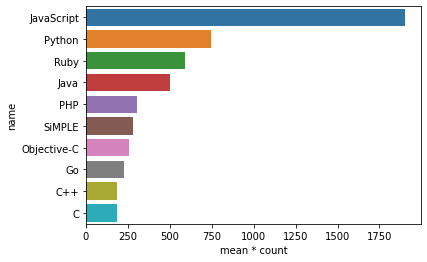

In [267]:
# Here are the top 10, based on the product of their average proporion and recurrences
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x="mean * count", y="name", data=top_valid_existing_languages_in_projects_df.head(10))

**What are the most popular language-combos that people love to use and a single programmer can feel empowered in having it in their toolkit?**

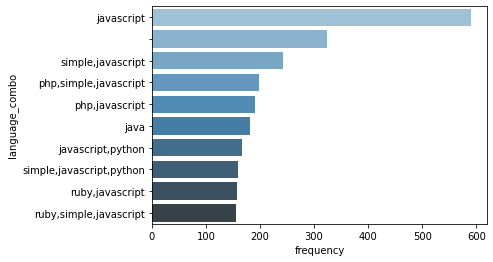

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x="frequency", y="language_combo", data=technology_combo_freq_df.head(10), palette="Blues_d")

**Shocked? Only a single language (Javascript) is still the top player! Looking deep, this actually is pretty legit, as Javascript has now become a language of choice for any kind of full-stack development these days. The next one is blank. Yes, it's blank, means there's nothing! Probably these are the accounts of the users who haven't started coding yet or all of their stuff are on private repositories. The community awaits them! Rest of the chart needs little explanation.**

**3. Are there duplicate users?**

In [269]:
# No.of unique user_ids
pd.DataFrame(user_lang_df.user_id.unique()).count()

0    17461
dtype: int64

In [270]:
# Check for the shape whether it matches the count in any way?
user_lang_df.shape

(17461, 1411)

***This means there aren't any duplicate users***

**The most-used (top 100) set of languages (claims) that are not there on the valid language list**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(data=invalid_existing_languages_in_projects_df.head(100), x="count", y="mean", hue="language")

plt.legend(title='top invalid languages: count vs mean', loc='upper right', bbox_to_anchor=(2.00, 2.00), ncol=1, labels=invalid_existing_languages_in_projects_df.head(100).language)

fig = plt.figure(figsize =(20, 20)) 
plt.show(ax)

**5. Does there seem to be close relation between languages used by Tech-giants like Google, Facebook or WordPress with programmers on GitHub?**

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np 
%matplotlib inline
  
big_tech_languages = big_tech_language_freq_dict.keys()
  
big_tech_languages_frequencies = big_tech_language_freq_dict.values()
  
# Creating plot 
fig_tech_giant = plt.figure(figsize =(12, 12)) 
plt.pie(big_tech_languages_frequencies, labels = big_tech_languages) 
  
# show plot 
plt.show() 

In [ ]:
github_usage_with_big_tech_languages = github_usage_with_big_tech_languages_df.language
github_usage_with_big_tech_languages_frequencies = github_usage_with_big_tech_languages_df['count'].astype(int)
  
fig_github_pie = plt.figure(figsize =(12, 12)) 
plt.pie(github_usage_with_big_tech_languages_frequencies, labels = github_usage_with_big_tech_languages) 
  
# show plot 
plt.show() 

***There seems to be clear correlation between the two above***

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

**The inferences are the following:**

**1. There's a huge gap between the number of usage of the first and the second which may mean Javscript is almost twice as used as Python in real projects.**

**2. The list of user-language combos show that which combinations of languages may land you a job, unless you know it by heart.**

**3. Languages which are not claimed to be valid seem to prove the fact that if a language doesn't play a big role (mean) in an average project from a user, it can't be counted in times of crises.**

**4. The languages used by the tech-giants are the most relevant in the industry. We see a clear relationship from the pie charts above,, with respect to people writing software at Github.**

**5. The difference observed between giant's Python share and Github's probably is due to the advent Data Science, because we've taken only the front-end and back-end languages from the Giant's dataset**

**We can conclude that our analysis has been successful in highlighting the trend in usage of these programming languages and which language we can pick or brush at this point in time.**

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

TODO

In [ ]:
import jovian

In [ ]:
jovian.commit()